In [1]:
%matplotlib inline
import collections
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn

In [2]:
df = pd.read_csv("C:\\stroke-data.csv")
df

id  gender   age  hypertension  heart_disease ever_married  \
0      9046    Male  67.0             0              1          Yes   
1     51676  Female  61.0             0              0          Yes   
2     31112    Male  80.0             0              1          Yes   
3     60182  Female  49.0             0              0          Yes   
4      1665  Female  79.0             1              0          Yes   
...     ...     ...   ...           ...            ...          ...   
5105  18234  Female  80.0             1              0          Yes   
5106  44873  Female  81.0             0              0          Yes   
5107  19723  Female  35.0             0              0          Yes   
5108  37544    Male  51.0             0              0          Yes   
5109  44679  Female  44.0             0              0          Yes   

          work_type Residence_type  avg_glucose_level   bmi   smoking_status  \
0           Private          Urban             228.69  36.6  formerly smoked   
1     Self-employed          Rural             202.21   NaN     never smoked   
2           Private          Rural             105.92  32.5     never smoked   
3           Private          Urban             171.23  34.4           smokes   
4     Self-employed          Rural             174.12  24.0     never smoked   
...             ...            ...                ...   ...              ...   
5105        Private          Urban              83.75   NaN     never smoked   
5106  Self-employed          Urban             125.20  40.0     never smoked   
5107  Self-employed          Rural              82.99  30.6     never smoked   
5108        Private          Rural             166.29  25.6  formerly smoked   
5109       Govt_job          Urban              85.28  26.2          Unknown   

      stroke  
0          1  
1          1  
2          1  
3          1  
4          1  
...      ...  
5105       0  
5106       0  
5107       0  
5108       0  
5109       0  

[5110 rows x 12 columns]

In [3]:
df.isnull().sum()

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

In [4]:
df = df.dropna()

In [5]:
df.isnull().sum()

id                   0
gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

In [6]:
df.gender.unique()

array(['Male', 'Female', 'Other'], dtype=object)

In [7]:
collections.Counter(df.gender)

Counter({'Male': 2011, 'Female': 2897, 'Other': 1})

In [8]:
df[(df.gender=='Other')].index

Int64Index([3116], dtype='int64')

In [9]:
df.drop(3116,axis=0)

id  gender   age  hypertension  heart_disease ever_married  \
0      9046    Male  67.0             0              1          Yes   
2     31112    Male  80.0             0              1          Yes   
3     60182  Female  49.0             0              0          Yes   
4      1665  Female  79.0             1              0          Yes   
5     56669    Male  81.0             0              0          Yes   
...     ...     ...   ...           ...            ...          ...   
5104  14180  Female  13.0             0              0           No   
5106  44873  Female  81.0             0              0          Yes   
5107  19723  Female  35.0             0              0          Yes   
5108  37544    Male  51.0             0              0          Yes   
5109  44679  Female  44.0             0              0          Yes   

          work_type Residence_type  avg_glucose_level   bmi   smoking_status  \
0           Private          Urban             228.69  36.6  formerly smoked   
2           Private          Rural             105.92  32.5     never smoked   
3           Private          Urban             171.23  34.4           smokes   
4     Self-employed          Rural             174.12  24.0     never smoked   
5           Private          Urban             186.21  29.0  formerly smoked   
...             ...            ...                ...   ...              ...   
5104       children          Rural             103.08  18.6          Unknown   
5106  Self-employed          Urban             125.20  40.0     never smoked   
5107  Self-employed          Rural              82.99  30.6     never smoked   
5108        Private          Rural             166.29  25.6  formerly smoked   
5109       Govt_job          Urban              85.28  26.2          Unknown   

      stroke  
0          1  
2          1  
3          1  
4          1  
5          1  
...      ...  
5104       0  
5106       0  
5107       0  
5108       0  
5109       0  

[4908 rows x 12 columns]

In [10]:
df.gender = pd.Categorical(df.gender,['Male', 'Female'],ordered=True)
df.gender = df.gender.cat.codes

c:\users\hp\appdata\local\programs\python\python39\lib\site-packages\pandas\core\generic.py:5494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


In [11]:
df.head()

id  gender   age  hypertension  heart_disease ever_married  \
0   9046       0  67.0             0              1          Yes   
2  31112       0  80.0             0              1          Yes   
3  60182       1  49.0             0              0          Yes   
4   1665       1  79.0             1              0          Yes   
5  56669       0  81.0             0              0          Yes   

       work_type Residence_type  avg_glucose_level   bmi   smoking_status  \
0        Private          Urban             228.69  36.6  formerly smoked   
2        Private          Rural             105.92  32.5     never smoked   
3        Private          Urban             171.23  34.4           smokes   
4  Self-employed          Rural             174.12  24.0     never smoked   
5        Private          Urban             186.21  29.0  formerly smoked   

   stroke  
0       1  
2       1  
3       1  
4       1  
5       1

In [12]:
df.ever_married.unique()

array(['Yes', 'No'], dtype=object)

In [13]:
df.ever_married = pd.Categorical(df.ever_married,['Yes', 'No'],ordered=True)
df.ever_married = df.ever_married.cat.codes

c:\users\hp\appdata\local\programs\python\python39\lib\site-packages\pandas\core\generic.py:5494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


In [14]:
df.head()

id  gender   age  hypertension  heart_disease  ever_married  \
0   9046       0  67.0             0              1             0   
2  31112       0  80.0             0              1             0   
3  60182       1  49.0             0              0             0   
4   1665       1  79.0             1              0             0   
5  56669       0  81.0             0              0             0   

       work_type Residence_type  avg_glucose_level   bmi   smoking_status  \
0        Private          Urban             228.69  36.6  formerly smoked   
2        Private          Rural             105.92  32.5     never smoked   
3        Private          Urban             171.23  34.4           smokes   
4  Self-employed          Rural             174.12  24.0     never smoked   
5        Private          Urban             186.21  29.0  formerly smoked   

   stroke  
0       1  
2       1  
3       1  
4       1  
5       1

In [15]:
df.work_type.unique()

array(['Private', 'Self-employed', 'Govt_job', 'children', 'Never_worked'],
      dtype=object)

In [16]:
df.work_type = pd.Categorical(df.work_type,['Private', 'Self-employed', 'Govt_job', 'children', 'Never_worked'],ordered=True)
df.work_type = df.work_type.cat.codes

c:\users\hp\appdata\local\programs\python\python39\lib\site-packages\pandas\core\generic.py:5494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


In [17]:
df.Residence_type.unique()

array(['Urban', 'Rural'], dtype=object)

In [18]:
df.Residence_type = pd.Categorical(df.Residence_type,['Urban', 'Rural'],ordered=True)
df.Residence_type = df.Residence_type.cat.codes

In [19]:
df.smoking_status.unique()

array(['formerly smoked', 'never smoked', 'smokes', 'Unknown'],
      dtype=object)

In [20]:
df.smoking_status= pd.Categorical(df.smoking_status,['formerly smoked', 'never smoked', 'smokes', 'Unknown'],ordered=True)
df.smoking_status = df.smoking_status.cat.codes

In [21]:
df.tail()

id  gender   age  hypertension  heart_disease  ever_married  \
5104  14180       1  13.0             0              0             1   
5106  44873       1  81.0             0              0             0   
5107  19723       1  35.0             0              0             0   
5108  37544       0  51.0             0              0             0   
5109  44679       1  44.0             0              0             0   

      work_type  Residence_type  avg_glucose_level   bmi  smoking_status  \
5104          3               1             103.08  18.6               3   
5106          1               0             125.20  40.0               1   
5107          1               1              82.99  30.6               1   
5108          0               1             166.29  25.6               0   
5109          2               0              85.28  26.2               3   

      stroke  
5104       0  
5106       0  
5107       0  
5108       0  
5109       0

# feature selection - univariate selection

In [22]:
X = df.drop("stroke",axis=1)
y = df["stroke"]

In [23]:
pd.set_option("display.max_row",None)
X

id  gender    age  hypertension  heart_disease  ever_married  \
0      9046       0  67.00             0              1             0   
2     31112       0  80.00             0              1             0   
3     60182       1  49.00             0              0             0   
4      1665       1  79.00             1              0             0   
5     56669       0  81.00             0              0             0   
6     53882       0  74.00             1              1             0   
7     10434       1  69.00             0              0             1   
9     60491       1  78.00             0              0             0   
10    12109       1  81.00             1              0             0   
11    12095       1  61.00             0              1             0   
12    12175       1  54.00             0              0             0   
14     5317       1  79.00             0              1             0   
15    58202       1  50.00             1              0             0   
16    56112       0  64.00             0              1             0   
17    34120       0  75.00             1              0             0   
18    27458       1  60.00             0              0             1   
20    70630       1  71.00             0              0             0   
21    13861       1  52.00             1              0             0   
22    68794       1  79.00             0              0             0   
23    64778       0  82.00             0              1             0   
24     4219       0  71.00             0              0             0   
25    70822       0  80.00             0              0             0   
26    38047       1  65.00             0              0             0   
28    54827       0  69.00             0              1             0   
30    43717       0  57.00             1              0             0   
31    33879       0  42.00             0              0             0   
32    39373       1  82.00             1              0             0   
33    54401       0  80.00             0              1             0   
34    14248       0  48.00             0              0             1   
35      712       1  82.00             1              1             1   
36    47269       0  74.00             0              0             0   
37    24977       1  72.00             1              0             0   
38    47306       0  58.00             0              0             1   
39    62602       1  49.00             0              0             0   
40     4651       0  78.00             0              0             0   
41     1261       0  54.00             0              0             0   
42    61960       0  82.00             0              1             0   
44     7937       0  60.00             1              0             0   
45    19824       0  76.00             1              0             0   
47    47472       1  58.00             0              0             0   
48    35626       0  81.00             0              0             0   
49    36338       1  39.00             1              0             0   
52    59190       1  79.00             0              1             0   
53    47167       1  77.00             1              0             0   
55    25831       0  63.00             0              1             0   
56    38829       1  82.00             0              0             0   
58    58631       0  73.00             1              0             0   
59     5111       1  54.00             1              0             0   
60    10710       1  56.00             0              0             0   
61    55927       1  80.00             1              0             0   
62    65842       1  67.00             1              0             0   
63    19557       1  45.00             0              0             0   
65    17013       0  78.00             1              0             1   
66    17004       1  70.00             0              0            

In [24]:
X[X<0] = 0

In [25]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

feature = SelectKBest(score_func=chi2,k=11)
fit = feature.fit(X,y)
score = pd.DataFrame(fit.scores_)
column = pd.DataFrame(X.columns)
feature_score = pd.concat([column,score],axis=1)
feature_score

0            0
0                  id  1366.732302
1              gender     0.094433
2                 age  3144.139535
3        hypertension    90.543821
4       heart_disease    88.779204
5        ever_married    35.384105
6           work_type    24.363346
7      Residence_type     0.090581
8   avg_glucose_level  1775.520314
9                 bmi    18.814363
10     smoking_status    21.226400

# Correlation matrix

<AxesSubplot:>

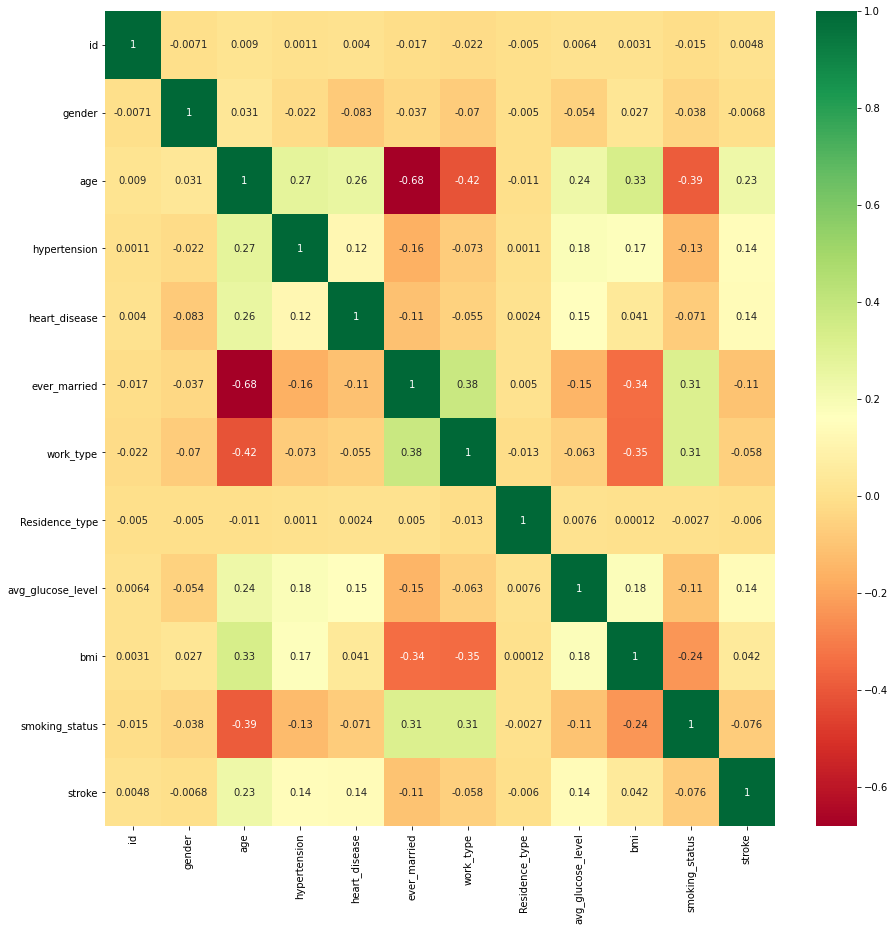

In [26]:
plt.figure(figsize = (15,15))
cor = df.corr()
top = cor.index
sns.heatmap(df[top].corr(),annot=True,cmap="RdYlGn")


In [27]:
X = df[['age','hypertension','heart_disease','avg_glucose_level']]
X

age  hypertension  heart_disease  avg_glucose_level
0     67.00             0              1             228.69
2     80.00             0              1             105.92
3     49.00             0              0             171.23
4     79.00             1              0             174.12
5     81.00             0              0             186.21
6     74.00             1              1              70.09
7     69.00             0              0              94.39
9     78.00             0              0              58.57
10    81.00             1              0              80.43
11    61.00             0              1             120.46
12    54.00             0              0             104.51
14    79.00             0              1             214.09
15    50.00             1              0             167.41
16    64.00             0              1             191.61
17    75.00             1              0             221.29
18    60.00             0              0              89.22
20    71.00             0              0             193.94
21    52.00             1              0             233.29
22    79.00             0              0             228.70
23    82.00             0              1             208.30
24    71.00             0              0             102.87
25    80.00             0              0             104.12
26    65.00             0              0             100.98
28    69.00             0              1             195.23
30    57.00             1              0             212.08
31    42.00             0              0              83.41
32    82.00             1              0             196.92
33    80.00             0              1             252.72
34    48.00             0              0              84.20
35    82.00             1              1              84.03
36    74.00             0              0             219.72
37    72.00             1              0              74.63
38    58.00             0              0              92.62
39    49.00             0              0              60.91
40    78.00             0              0              78.03
41    54.00             0              0              71.22
42    82.00             0              1             144.90
44    60.00             1              0             213.03
45    76.00             1              0             243.58
47    58.00             0              0             107.26
48    81.00             0              0              99.33
49    39.00             1              0              58.09
52    79.00             0              1             127.29
53    77.00             1              0             124.13
55    63.00             0              1             196.71
56    82.00             0              0              59.32
58    73.00             1              0             194.99
59    54.00             1              0             180.93
60    56.00             0              0             185.17
61    80.00             1              0              74.90
62    67.00             1              0              61.94
63    45.00             0              0              93.72
65    78.00             1              0             113.01
66    70.00             0              0             221.58
67    76.00             0              0             104.47
68    59.00             0              0              86.23
69    80.00             1              0              72.67
71    67.00             1              0             179.12
72    66.00             1              0             116.55
73    63.00             0              0             228.56
74    52.00             0              0              96.59
75    80.00             0              1              66.72
76    80.00             1              0             240.09
77    79.00             0              0             110.85
79    43.00             0              0             143.43
80    59.00             0              0        

# train_test_split

In [28]:
from sklearn.model_selection import train_test_split

In [29]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state = 51)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(3927, 4)
(982, 4)
(3927,)
(982,)


# feature scalling

In [30]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
sc.fit(X_train)
X_train_sc = sc.transform(X_train)
X_test_sc = sc.transform(X_test)

In [31]:
X_train_sc = pd.DataFrame(X_train_sc, columns=X.columns)
X_test_sc = pd.DataFrame(X_test_sc, columns=X.columns)

# linear regression

In [32]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X_train,y_train)
lr.score(X_test,y_test)

0.07887673122092187

In [33]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X_train_sc,y_train)
lr.score(X_test_sc,y_test)

0.07887673122092187

# logistic regression

In [34]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(X_train,y_train)
lr.score(X_test,y_test)

0.9653767820773931

In [35]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(X_train_sc,y_train)
lr.score(X_test_sc,y_test)

0.9653767820773931

# SVC

In [36]:
from sklearn.svm import SVC
svc = SVC()
svc.fit(X_train,y_train)
svc.score(X_test,y_test)

0.9653767820773931

In [37]:
from sklearn.svm import SVC
svc = SVC()
svc.fit(X_train_sc,y_train)
svc.score(X_test_sc,y_test)

0.9653767820773931

# Decesion tree

In [38]:
from sklearn.tree import DecisionTreeClassifier
rg = DecisionTreeClassifier(criterion='gini')
rg.fit(X_train,y_train)
rg.score(X_test,y_test)

0.9348268839103869

In [39]:
from sklearn.tree import DecisionTreeClassifier
rg = DecisionTreeClassifier(criterion='gini')
rg.fit(X_train_sc,y_train)
rg.score(X_test_sc,y_test)

0.9338085539714868

# Random forest

In [40]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators = 100, criterion = 'entropy')
rf.fit(X_train,y_train)
rf.score(X_test,y_test)

0.955193482688391

In [41]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators = 100, criterion = 'entropy')
rf.fit(X_train_sc,y_train)
rf.score(X_test_sc,y_test)

0.9541751527494908

# KNN

In [42]:
from sklearn.neighbors import KNeighborsClassifier
kn = KNeighborsClassifier(n_neighbors=10)
kn.fit(X_train,y_train)
kn.score(X_test,y_test)

0.9653767820773931

In [43]:
from sklearn.neighbors import KNeighborsClassifier
kn = KNeighborsClassifier(n_neighbors=10)
kn.fit(X_train_sc,y_train)
kn.score(X_test_sc,y_test)

0.9653767820773931

# XGBoost

In [44]:
from xgboost import XGBClassifier
xgb = XGBClassifier()
xgb.fit(X_train,y_train)
xgb.score(X_test,y_test)

c:\users\hp\appdata\local\programs\python\python39\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[14:27:29] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


c:\users\hp\appdata\local\programs\python\python39\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


0.9592668024439919

In [45]:
from xgboost import XGBClassifier
xgb = XGBClassifier()
xgb.fit(X_train_sc,y_train)
xgb.score(X_test_sc,y_test)

c:\users\hp\appdata\local\programs\python\python39\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[14:27:29] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


c:\users\hp\appdata\local\programs\python\python39\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


0.9582484725050916

# Adaboost

In [46]:
from sklearn.ensemble import AdaBoostClassifier
ada = AdaBoostClassifier(random_state=200,n_estimators=2000,learning_rate=0.1,algorithm="SAMME.R")
ada.fit(X_train,y_train)
ada.score(X_test,y_test)

0.9643584521384929

In [47]:
from sklearn.ensemble import AdaBoostClassifier
ada = AdaBoostClassifier(random_state=200,n_estimators=2000,learning_rate=0.1,algorithm="SAMME.R")
ada.fit(X_train_sc,y_train)
ada.score(X_test_sc,y_test)

0.9643584521384929

# Naive_bayes

In [48]:
from sklearn.naive_bayes import GaussianNB
gauss = GaussianNB()
gauss.fit(X_train,y_train)
gauss.score(X_test,y_test)

0.8920570264765784

In [49]:
from sklearn.naive_bayes import BernoulliNB
bur = BernoulliNB()
bur.fit(X_train,y_train)
bur.score(X_test,y_test)

0.9653767820773931

# Hyperparameter tunning

In [50]:
params = {
    'penalty' : ['l1','l2'],
    'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'],
    'multi_class': ['auto', 'ovr', 'multinomial'],
    'C' : [1.0,2.0,3.0]
     }

In [51]:
from sklearn.model_selection import RandomizedSearchCV
random = RandomizedSearchCV(lr,params)
random.fit(X_train,y_train)
random.best_estimator_
random.best_params_

c:\users\hp\appdata\local\programs\python\python39\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "c:\users\hp\appdata\local\programs\python\python39\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\users\hp\appdata\local\programs\python\python39\lib\site-packages\sklearn\linear_model\_logistic.py", line 1306, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "c:\users\hp\appdata\local\programs\python\python39\lib\site-packages\sklearn\linear_model\_logistic.py", line 443, in _check_solver
    raise ValueError("Solver %s supports only 'l2' or 'none' penalties, "
ValueError: Solver sag supports only 'l2' or 'none' penalties, got l1 penalty.

  warnings.warn("Estimator fit faile

c:\users\hp\appdata\local\programs\python\python39\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
c:\users\hp\appdata\local\programs\python\python39\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
c:\users\hp\appdata\local\programs\python\python39\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
c:\users\hp\appdata\local\programs\python\python39\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
c:\users\hp\appdata\local\pr

c:\users\hp\appdata\local\programs\python\python39\lib\site-packages\sklearn\model_selection\_search.py:922: UserWarning: One or more of the test scores are non-finite: [0.9554367       nan 0.9554367       nan       nan 0.9554367 0.9554367
 0.9554367       nan 0.9554367]
  warnings.warn(


{'solver': 'newton-cg',
 'penalty': 'l2',
 'multi_class': 'multinomial',
 'C': 3.0}

In [52]:
from sklearn.model_selection import GridSearchCV
grid = GridSearchCV(lr,params)
grid.fit(X_train_sc,y_train)
grid.best_estimator_

c:\users\hp\appdata\local\programs\python\python39\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "c:\users\hp\appdata\local\programs\python\python39\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\users\hp\appdata\local\programs\python\python39\lib\site-packages\sklearn\linear_model\_logistic.py", line 1306, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "c:\users\hp\appdata\local\programs\python\python39\lib\site-packages\sklearn\linear_model\_logistic.py", line 443, in _check_solver
    raise ValueError("Solver %s supports only 'l2' or 'none' penalties, "
ValueError: Solver newton-cg supports only 'l2' or 'none' penalties, got l1 penalty.

  warnings.warn("Estimator fit

c:\users\hp\appdata\local\programs\python\python39\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "c:\users\hp\appdata\local\programs\python\python39\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\users\hp\appdata\local\programs\python\python39\lib\site-packages\sklearn\linear_model\_logistic.py", line 1306, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "c:\users\hp\appdata\local\programs\python\python39\lib\site-packages\sklearn\linear_model\_logistic.py", line 443, in _check_solver
    raise ValueError("Solver %s supports only 'l2' or 'none' penalties, "
ValueError: Solver newton-cg supports only 'l2' or 'none' penalties, got l1 penalty.

  warnings.warn("Estimator fit

c:\users\hp\appdata\local\programs\python\python39\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "c:\users\hp\appdata\local\programs\python\python39\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\users\hp\appdata\local\programs\python\python39\lib\site-packages\sklearn\linear_model\_logistic.py", line 1306, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "c:\users\hp\appdata\local\programs\python\python39\lib\site-packages\sklearn\linear_model\_logistic.py", line 443, in _check_solver
    raise ValueError("Solver %s supports only 'l2' or 'none' penalties, "
ValueError: Solver newton-cg supports only 'l2' or 'none' penalties, got l1 penalty.

  warnings.warn("Estimator fit

c:\users\hp\appdata\local\programs\python\python39\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "c:\users\hp\appdata\local\programs\python\python39\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\users\hp\appdata\local\programs\python\python39\lib\site-packages\sklearn\linear_model\_logistic.py", line 1350, in fit
    multi_class = _check_multi_class(self.multi_class, solver,
  File "c:\users\hp\appdata\local\programs\python\python39\lib\site-packages\sklearn\linear_model\_logistic.py", line 473, in _check_multi_class
    raise ValueError("Solver %s does not support "
ValueError: Solver liblinear does not support a multinomial backend.

  warnings.warn("Estimator fit failed. The score on this train-tes

c:\users\hp\appdata\local\programs\python\python39\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "c:\users\hp\appdata\local\programs\python\python39\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\users\hp\appdata\local\programs\python\python39\lib\site-packages\sklearn\linear_model\_logistic.py", line 1306, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "c:\users\hp\appdata\local\programs\python\python39\lib\site-packages\sklearn\linear_model\_logistic.py", line 443, in _check_solver
    raise ValueError("Solver %s supports only 'l2' or 'none' penalties, "
ValueError: Solver newton-cg supports only 'l2' or 'none' penalties, got l1 penalty.

  warnings.warn("Estimator fit

c:\users\hp\appdata\local\programs\python\python39\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "c:\users\hp\appdata\local\programs\python\python39\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\users\hp\appdata\local\programs\python\python39\lib\site-packages\sklearn\linear_model\_logistic.py", line 1306, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "c:\users\hp\appdata\local\programs\python\python39\lib\site-packages\sklearn\linear_model\_logistic.py", line 443, in _check_solver
    raise ValueError("Solver %s supports only 'l2' or 'none' penalties, "
ValueError: Solver newton-cg supports only 'l2' or 'none' penalties, got l1 penalty.

  warnings.warn("Estimator fit

c:\users\hp\appdata\local\programs\python\python39\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "c:\users\hp\appdata\local\programs\python\python39\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\users\hp\appdata\local\programs\python\python39\lib\site-packages\sklearn\linear_model\_logistic.py", line 1350, in fit
    multi_class = _check_multi_class(self.multi_class, solver,
  File "c:\users\hp\appdata\local\programs\python\python39\lib\site-packages\sklearn\linear_model\_logistic.py", line 473, in _check_multi_class
    raise ValueError("Solver %s does not support "
ValueError: Solver liblinear does not support a multinomial backend.

  warnings.warn("Estimator fit failed. The score on this train-tes

c:\users\hp\appdata\local\programs\python\python39\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "c:\users\hp\appdata\local\programs\python\python39\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\users\hp\appdata\local\programs\python\python39\lib\site-packages\sklearn\linear_model\_logistic.py", line 1306, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "c:\users\hp\appdata\local\programs\python\python39\lib\site-packages\sklearn\linear_model\_logistic.py", line 443, in _check_solver
    raise ValueError("Solver %s supports only 'l2' or 'none' penalties, "
ValueError: Solver newton-cg supports only 'l2' or 'none' penalties, got l1 penalty.

  warnings.warn("Estimator fit

c:\users\hp\appdata\local\programs\python\python39\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "c:\users\hp\appdata\local\programs\python\python39\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\users\hp\appdata\local\programs\python\python39\lib\site-packages\sklearn\linear_model\_logistic.py", line 1306, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "c:\users\hp\appdata\local\programs\python\python39\lib\site-packages\sklearn\linear_model\_logistic.py", line 443, in _check_solver
    raise ValueError("Solver %s supports only 'l2' or 'none' penalties, "
ValueError: Solver newton-cg supports only 'l2' or 'none' penalties, got l1 penalty.

  warnings.warn("Estimator fit

c:\users\hp\appdata\local\programs\python\python39\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "c:\users\hp\appdata\local\programs\python\python39\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\users\hp\appdata\local\programs\python\python39\lib\site-packages\sklearn\linear_model\_logistic.py", line 1350, in fit
    multi_class = _check_multi_class(self.multi_class, solver,
  File "c:\users\hp\appdata\local\programs\python\python39\lib\site-packages\sklearn\linear_model\_logistic.py", line 473, in _check_multi_class
    raise ValueError("Solver %s does not support "
ValueError: Solver liblinear does not support a multinomial backend.

  warnings.warn("Estimator fit failed. The score on this train-tes

LogisticRegression(penalty='l1', solver='liblinear')

In [53]:
from sklearn.linear_model import LogisticRegression
lr_hyper = LogisticRegression(solver='newton-cg', penalty='l2', multi_class='multinomial', C=3.0)
lr_hyper.fit(X_train,y_train)
lr_hyper.score(X_test,y_test)

0.9653767820773931

In [54]:
from sklearn.linear_model import LogisticRegression
lr_hypergrid = LogisticRegression(penalty='l1', solver='liblinear')
lr_hypergrid.fit(X_train,y_train)
lr_hypergrid.score(X_test,y_test)

0.9653767820773931

In [55]:
a = lr.predict(X_test)
collections.Counter(a)

Counter({1: 982})

In [56]:
collections.Counter(y_test)

Counter({0: 948, 1: 34})

In [57]:
import tensorflow as tf
from tensorflow import keras

INFO:tensorflow:Enabling eager execution
INFO:tensorflow:Enabling v2 tensorshape
INFO:tensorflow:Enabling resource variables
INFO:tensorflow:Enabling tensor equality
INFO:tensorflow:Enabling control flow v2


In [58]:
model = keras.Sequential([keras.layers.Dense(100,activation='ReLU'),
                          keras.layers.Dense(10,activation='sigmoid')
                        ])

In [59]:
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])
model.fit(X_train,y_train,epochs=7)
model.evaluate(X_test,y_test)

Epoch 1/7
123/123 [==============================] - 1s 2ms/step - loss: 1.2796 - accuracy: 0.9048
Epoch 2/7
123/123 [==============================] - 0s 2ms/step - loss: 0.2557 - accuracy: 0.9547
Epoch 3/7
123/123 [==============================] - 0s 2ms/step - loss: 0.2416 - accuracy: 0.9542
Epoch 4/7
123/123 [==============================] - 0s 2ms/step - loss: 0.2334 - accuracy: 0.9544
Epoch 5/7
123/123 [==============================] - 0s 2ms/step - loss: 0.2177 - accuracy: 0.9554
Epoch 6/7
123/123 [==============================] - 0s 2ms/step - loss: 0.2102 - accuracy: 0.9539
Epoch 7/7
31/31 [==============================] - 0s 1ms/step - loss: 0.1566 - accuracy: 0.9654


[0.1565685123205185, 0.9653767943382263]

In [60]:
lr.predict([[85.0,1,0,100]])

array([1], dtype=int64)

In [61]:
sample = [[51.00,0,0,166.29]]
#pr = pd.DataFrame(sample,columns = ['age','hypertension','heart_disease','avg_glucose_level'])
lr.predict(sample)

array([1], dtype=int64)

In [62]:
X_test.shape

(982, 4)

In [63]:
lr.predict(X_test)

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,